### Ejercicio 1

En clase vimos que la función `bits` permite ver la representación binaria de números de punto flotante (`Float64`) o de enteros (e.g., `Int64`). En particular, para números de punto flotante, el primer bit es el signo, los siguiente 11 son el *exponente* y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.

La pregunta es ¿qué significa el exponente?

```julia
bits(1.0)
"0011111111110000000000000000000000000000000000000000000000000000"
```

La representación binaria del número (los últimos 52 dígitos) está normalizada; es decir, el punto binario se recorre hasta que sólo quede un 1 antes de él. Entonces la representación binaria queda multiplicada por un exponente (como cuando en sistema decimal representamos a $1000$ como $1x10^3$). A este exponente se le suma un 'bias' de 1023 y este número se escribe en representación binaria, dando como resultado los 11 dígitos. 

Esta explicación y ejemplos los obtuve de: http://chrishecker.com/images/f/fb/Gdmfp.pdf

### Ejercicio 2

- ¿Cuál es el número más chico que sumado (o restado) a 1.0 me da algo distinto de 1.0?
(Este número se bautiza como el "épsilon de la máquina")

- ¿Cuál es el número más chico que sumado (o restado) a 10.0 me da algo distinto de 10.0?


In [18]:
epsilon = 1.0;

while (1.0 + 0.5 * epsilon) ≠ 1.0
    epsilon = 0.5 * epsilon
end

In [19]:
epsilon

2.220446049250313e-16

In [20]:
epsilon = 1.0;

while (10.0 + 0.5 * epsilon) ≠ 10.0
    epsilon = 0.5 * epsilon
end

In [21]:
epsilon

1.7763568394002505e-15

Para encontrar el épsilon, usamos un método de búsqueda lineal (fuerza bruta). Empezamos con un candidato grande y se lo sumamos a 1. Si el resultado es distinto de 1, quiere decir que necesitamos un número más chico. Entonces, lo dividimos a la mitad y volvemos a hacer lo mismo, hasta que encontremos el número tal que sumado a 1 siga siendo 1. 
Fuente de inspiración: Wikipedia (https://en.wikipedia.org/wiki/Machine_epsilon)

### Ejercicio 3

Define una función llamada `derivada1` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h}
$$

Obviamente esta función es una aproximación *finita* de la derivada. La pregunta es ¿qué tan buena es esta aproximación, pensando en términos de $h$?

- La primer sub-pregunta es ¿cómo se responde este tipo de pregunta?
- Uno tiene que tomar un caso concreto (para $f(x_0,h)$); sugiero empezar con un polinomio con coeficientes enteros, y después hacer el mismo tipo de pruebas con una función trascendental.
- ¿Hay algo *sorprendente* en el comportamiento de `derivada1` como función de $h$? ¿A qué lo puedes atribuir?
- ¿Puedes hacer que la función `derivada1` funcione para funciones más o menos arbitrarias, que el usuario define?
- ¿Puedes explicar de alguna manera los resultados que has obtenido?

In [22]:
f(x) = x^2 + 2*x
fprima(x) = 2*x + 2

function derivada1(x_0,h=0.2)
    (f(x_0+h)-f(x_0))/h
end

println("La derivada de f en x=1 es ",fprima(1))
println("La aproximación en x=1 es ",derivada1(1))
println("El error es ",abs(fprima(1)-derivada1(1)))

La derivada de f en x=1 es 4
La aproximación en x=1 es 4.199999999999999
El error es 0.1999999999999993


In [23]:
f(x) = sin(x)
fprima(x) = cos(x)

function derivada1(x_0,h=0.2)
    (f(x_0+h)-f(x_0))/h
end

println("La derivada de f en x=1 es ",fprima(1))
println("La aproximación en x=1 es ",derivada1(1))
println("El error es ",abs(fprima(1)-derivada1(1)))

La derivada de f en x=1 es 0.5403023058681398
La aproximación en x=1 es 0.4528405057966489
El error es 0.08746180007149085


In [24]:
f(x) = log(x)
fprima(x) = 1/x

function derivada1(x_0,h=0.2)
    (f(x_0+h)-f(x_0))/h
end

println("La derivada de f en x=1 es ",fprima(1))
println("La aproximación en x=1 es ",derivada1(1))
println("El error es ",abs(fprima(1)-derivada1(1)))

La derivada de f en x=1 es 1.0
La aproximación en x=1 es 0.9116077839697729
El error es 0.08839221603022707


Ahora, podemos ver qué pasa con el error al variar h:

In [25]:
f(x) = x^2 + 2*x
fprima(x) = 2*x + 2

function derivada1(x_0,h=0.2)
    (f(x_0+h)-f(x_0))/h
end

H = zeros(10)
ERR = zeros(10) 

for i in 10:10:100
    h = 2/i
    derivada = derivada1(1,h)
    err = abs(fprima(1)-derivada1(1,h))
    H[i/10] = h
    ERR[i/10] = err
end  

In [26]:
using PyPlot

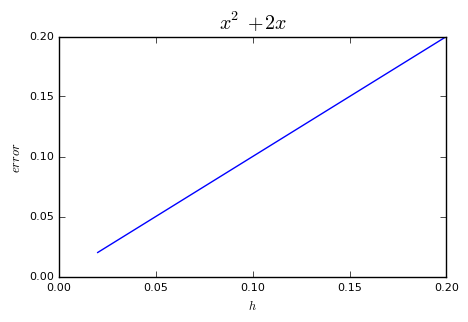

In [27]:
figure(figsize=(5,3))
plot(H,ERR)
title(L"x^2 + 2x")
ylim(0,0.2)
xlabel(L"h", fontsize = 9)
ylabel(L"error", fontsize = 9)
xticks(fontsize = 8)
yticks(fontsize = 8);

In [28]:
f(x) = sin(x)
fprima(x) = cos(x)

function derivada1(x_0,h=0.2)
    (f(x_0+h)-f(x_0))/h
end

H = zeros(10)
ERR = zeros(10) 

for i in 10:10:100
    h = 2/i
    derivada = derivada1(1,h)
    err = abs(fprima(1)-derivada1(1,h))
    H[i/10] = h
    ERR[i/10] = err
end  

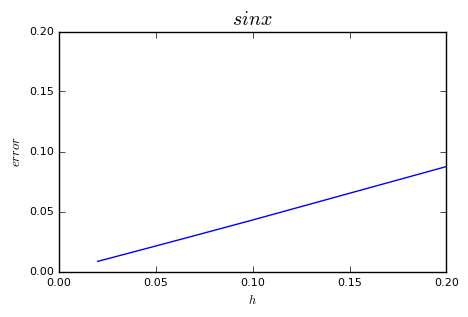

In [29]:
figure(figsize=(5,3))
plot(H,ERR)
title(L"sin x")
ylim(0,0.2)
xlabel(L"h", fontsize = 9)
ylabel(L"error", fontsize = 9)
xticks(fontsize = 8)
yticks(fontsize = 8);

El error disminuye de manera lineal, mientras la h se hace pequeña.

### Ejercicio 4

Este ejercicio es equivalente al anterior, pero considerando la función `derivada2` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

¿Puedes explicar por qué la convergencia es mejor en este caso?


In [37]:
f(x) = x^2 + 2*x
fprima(x) = 2*x + 2

function derivada2(x_0,h=0.2)
    (f(x_0+h)-f(x_0-h))/(2*h)
end

println("La derivada de f en x=1 es ",fprima(1))
println("La aproximación en x=1 es ",derivada2(1))
println("El error es ",abs(fprima(1)-derivada2(1)))

La derivada de f en x=1 es 4
La aproximación en x=1 es 3.999999999999999
El error es 8.881784197001252e-16


In [38]:
f(x) = sin(x)
fprima(x) = cos(x)

function derivada2(x_0,h=0.2)
    (f(x_0+h)-f(x_0-h))/(2*h)
end

println("La derivada de f en x=1 es ",fprima(1))
println("La aproximación en x=1 es ",derivada2(1))
println("El error es ",abs(fprima(1)-derivada2(1)))

La derivada de f en x=1 es 0.5403023058681398
La aproximación en x=1 es 0.5367074876692587
El error es 0.003594818198881078


Ahora, podemos ver qué pasa con el error al variar h:

In [62]:
f(x) = x^2 + 2*x
fprima(x) = 2*x + 2

function derivada2(x_0,h=0.2)
    (f(x_0+h)-f(x_0-h))/(2*h)
end

H = zeros(10)
ERR = zeros(10) 

for i in 10:10:100
    h = 2/i
    derivada = derivada2(1,h)
    err = abs(fprima(1)-derivada2(1,h))
    H[i/10] = h
    ERR[i/10] = err
end  

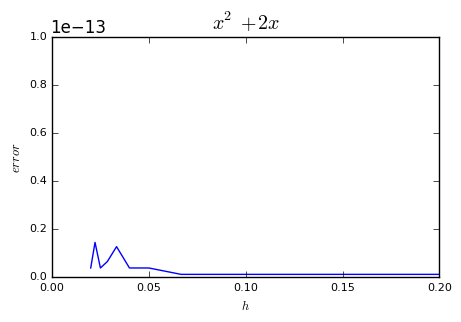

In [63]:
figure(figsize=(5,3))
plot(H,ERR)
title(L"x^2 + 2x")
ylim(0,1e-13)
xlabel(L"h", fontsize = 9)
ylabel(L"error", fontsize = 9)
xticks(fontsize = 8)
yticks(fontsize = 8);

In [64]:
f(x) = sin(x)
fprima(x) = cos(x)

function derivada2(x_0,h=0.2)
    (f(x_0+h)-f(x_0-h))/(2*h)
end

H = zeros(10)
ERR = zeros(10) 

for i in 10:10:100
    h = 2/i
    derivada = derivada2(1,h)
    err = abs(fprima(1)-derivada2(1,h))
    H[i/10] = h
    ERR[i/10] = err
end 

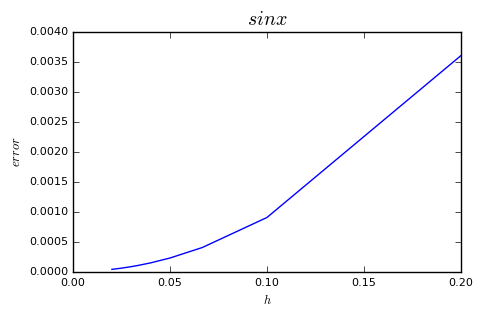

In [69]:
figure(figsize=(5,3))
plot(H,ERR)
title(L"sin x")
#ylim(0,0.2)
xlabel(L"h", fontsize = 9)
ylabel(L"error", fontsize = 9)
xticks(fontsize = 8)
yticks(fontsize = 8);

### Ejercicio 5

Manda el notebook con tus resultados haciendo un pull-request al repositorio del curso. Para hacer esto:
- Haz un `fork` del repositorio del curso a tu propia cuenta en GitHub
- Una vez que tengas resuelto el notebook, súbelo a **tu** repositorio (con `git push`), en la carpeta "tareas/usuario_github/nombre_notebook"
- Desde tu repositorio, haz un "Pull Request". El *pull request* sólo se aceptará si es legible en el sentido más amplio de la palabra y, obviamente, si es correcto. Esto significa que debe ser *entendible*, a partir de lo que ustedes escriben, incluso para gente que no está en el curso. (Como GitHub es público, piensen fríamente que esto puede ser leido por *muuucha* gente allá afuera.) Si el trabajo es en colaboración, háganlo saber en el propio notebook (cosa que se debe notar en el historial de lo que envíen). Finalmente, como código ético, incluyan cualquier fuente de inspiración, incluso cuando se trate del notebook de otro compañero/equipo del curso.